Kenneth Putra Abadi

## Research question/interests

Correlation between BMI and medical costs between smokers and non-smokers
Using a scatter plot to find visualize the correlation between Charges and BMI between smokers and non-smokers.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
med = pd.read_csv("../data/raw/medical_expense.csv")

Correlation Coefficient of Smoker's BMI vs Charges =  0.8064806070155401


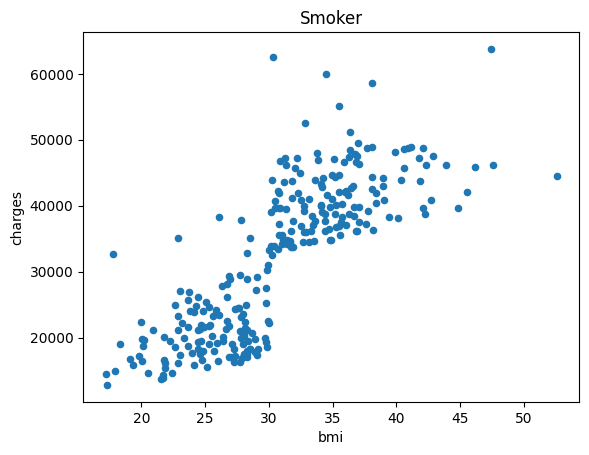

In [25]:
smoke = med[med["smoker"] == "yes"]
smoke = smoke[["bmi","charges"]]
smoke.plot(kind='scatter',x = 'bmi', y = 'charges',title= "Smoker")
coeffsmoke = smoke['bmi'].corr(smoke['charges'])
print("Correlation Coefficient of Smoker's BMI vs Charges = ", coeffsmoke)

Correlation Coefficient of non-Smoker's BMI vs Charges =  0.0840365431283327


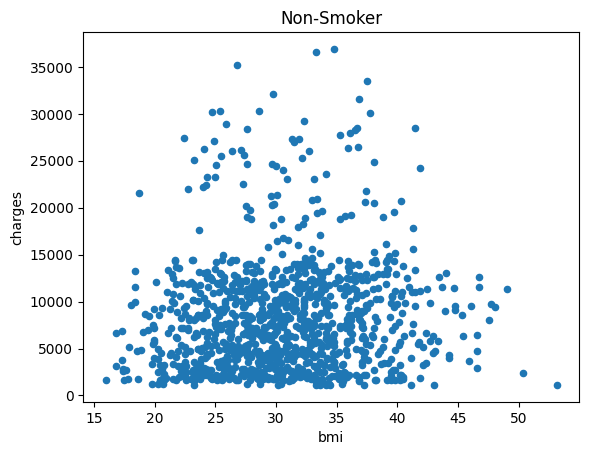

In [26]:
nosmoke = med[med["smoker"] == "no"]
nosmoke = nosmoke[["bmi","charges"]]
nosmoke.plot(kind='scatter',x = 'bmi', y = 'charges',title= "Non-Smoker")
coeffnosmoke = nosmoke['bmi'].corr(nosmoke['charges'])
print("Correlation Coefficient of non-Smoker's BMI vs Charges = ", coeffnosmoke)

### Does Region affect BMI and Charges? 


In [26]:
medreg = med.drop(['sex','smoker','children'], axis = 1)
medregse

,age,bmi,region,charges
1,18,33.77,southeast,1725.5523
2,28,33.00,southeast,4449.4620
5,31,25.74,southeast,3756.6216
6,46,33.44,southeast,8240.5896
11,62,26.29,southeast,27808.7251
...,...,...,...,...
1322,62,38.83,southeast,12981.3457
1323,42,40.37,southeast,43896.3763
1327,51,30.03,southeast,9377.9047
1330,57,25.74,southeast,12629.1656


<AxesSubplot: title={'center': 'charges'}, xlabel='region'>

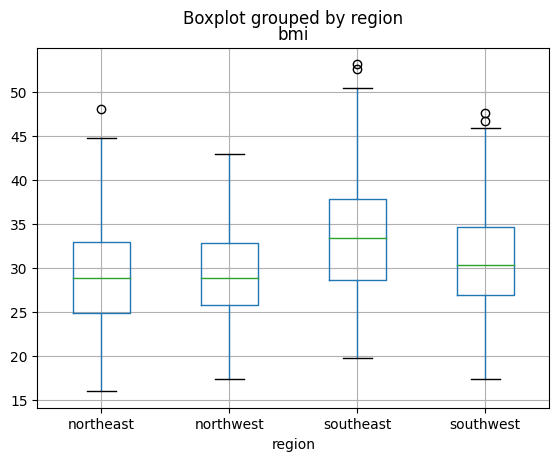

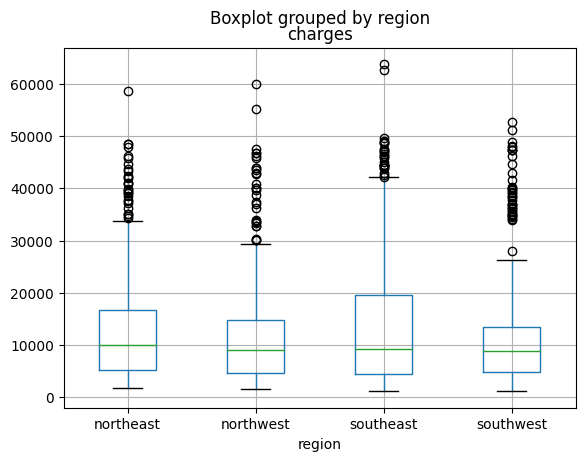

In [35]:
medreg.boxplot(by= 'region', column = ['bmi'])
medreg.boxplot(by= 'region', column = ['charges'])